In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# Install a LaTeX distribution and other dependencies
!apt-get install texlive-fonts-recommended texlive-fonts-extra
!apt-get install dvipng

# Install the required Python packages for Matplotlib
!pip install matplotlib numpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-extra is already the newest version (2021.20220204-1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
dvipng is already the newest version (1.15-1.1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [123]:
!apt-get install texlive-fonts-recommended texlive-fonts-extra
!apt-get install dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-extra is already the newest version (2021.20220204-1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
dvipng is already the newest version (1.15-1.1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [124]:
!apt-get install texlive-fonts-recommended
!apt-get install texlive-fonts-extra


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


# Corruption network

In [125]:
#sets the notebook width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
#Third Party Libraries
import pandas as pd
import numpy as np
from scipy import stats
import random
from operator import itemgetter
# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as plticker
from matplotlib import ticker
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

#Networks
import networkx as nx

In [128]:
def stdfigsize(scale=1, nx=1, ny=1, ratio=1.3):
    """
    Returns a tuple to be used as figure size.
    -------
    returns (7*ratio*scale*nx, 7.*scale*ny)
    By default: ratio=1.3
    If ratio<0 them ratio = golden ratio
    """
    if ratio < 0:
        ratio = 1.61803398875
    return((7*ratio*scale*nx, 7*scale*ny))

def stdrcparams(usetex=False):
    """
    Set several mpl.rcParams and sns.set_style for my taste.
    ----
    usetex = True
    ----
    """
    sns.set_style("white")
    sns.set_style({"xtick.direction": "in",
                 "ytick.direction": "in"})
    rcparams = {'text.usetex': usetex,
              'font.family': 'sans-serif',
              'font.sans-serif': ['Helvetica'],
              'text.latex.unicode': True,
              'text.latex.preamble': [r"\usepackage[T1]{fontenc}",
                                      r"\usepackage{lmodern}",
                                      r"\usepackage{amsmath}",
                                      r"\usepackage{mathptmx}"
                                      ],
              'axes.labelsize': 30,
              'axes.titlesize': 30,
              'ytick.right': 'on',
              'xtick.top': 'on',
              'ytick.left': 'on',
              'xtick.bottom': 'on',
              'xtick.labelsize': '25',
              'ytick.labelsize': '25',
              'axes.linewidth': 1.8,
              'xtick.major.width': 1.8,
              'xtick.minor.width': 1.8,
              'xtick.major.size': 14,
              'xtick.minor.size': 7,
              'xtick.major.pad': 10,
              'xtick.minor.pad': 10,
              'ytick.major.width': 1.8,
              'ytick.minor.width': 1.8,
              'ytick.major.size': 14,
              'ytick.minor.size': 7,
              'ytick.major.pad': 10,
              'ytick.minor.pad': 10,
              'axes.labelpad': 15,
              'axes.titlepad': 15,
              "xtick.direction": "in",
              "ytick.direction": "in"
              }
    # Set LaTeX-related parameter
    plt.rcParams['text.usetex'] = True  # Example parameter, adjust as needed

stdrcparams(usetex=True)
figsize=stdfigsize()
print(figsize)

(9.1, 7)


In [129]:
def moving_average(a, n=3):
    """
    Calculates the moving average over an array.
    Parameters
    ----------
    a: array
    n: windows size (default = 3)
    ----------
    Returns the moving average of a.
    """
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def pdf(data, nbins=15, log=False, symmetrical=False):
    """
    Estimates the pdf from a np.array.
    Parameters
    ----------
    data: np.array
    nbins: number of bins or np.histogram method name (Default: 15).
    log: True for log-spaced bins (Default: False).
    symmetrical: True for symmetrical bin interval (Default: False).
    ----------
    Returns [bins,pdf].
    """
    if not isinstance(nbins, str):
        if log:
            if symmetrical:
                maxdata = max(np.abs(np.min(data)), np.abs(np.max(data)))
                bins = np.logspace(-maxdata, maxdata, nbins)
            else:
                bins = np.logspace(np.log10(np.min(data)), np.log10(np.max(data)), nbins)
        else:
            if symmetrical:
                maxdata = max(np.abs(np.min(data)), np.abs(np.max(data)))
                bins = np.linspace(-maxdata, maxdata, nbins)
            else:
                bins = np.linspace(np.min(data), np.max(data), nbins)
    else:
        bins = nbins
    densities, bbins = np.histogram(data, bins=bins, density=True)
    return moving_average(bbins, 2), densities


def cdf(data, nbins=15, log=False, surv=True):
    """
    Estimates the survival distribution from a np.array.
    Parameters
    ----------
    data: np.array
    nbins: number of bins.
    log: True for log-spaced bins (Default: False).
    surv: False for cumulative distribution function (Default: True).
    ----------
    Returns [bins,pdf].
    """
    size = len(data)
    if log:
        bins = np.logspace(np.log10(np.min(data)), np.log10(np.max(data)), nbins)
    else:
        bins = np.linspace(np.min(data), np.max(data),nbins)
    densities = np.array([len(data[data>=binvalue])/size for binvalue in bins])
    if not surv:
        densities = 1 - densities
    return bins, densities

# Demography corruption network

- HV Ribeiro, LGA Alves, AF Martins, EK Lenzi, M Perc. The dynamical structure of political corruption networks. Journal of Complex Networks CNY002 1-15 (2018).

In [130]:
df_size=pd.read_csv("/content/drive/MyDrive/sin../SIN PROJECT/Corruption Analysis/data/scandalssize.csv",index_col=0)

In [131]:
df_size.head()

scandal  year  size
0          Caso Banespa  1987     4
1    Ferrovia Norte-Sul  1987     2
2      CPI da Corrupção  1988     3
3  Máfia da Previdência  1991     3
4           Caso Collor  1992    11

Text(0.5, 0, 'Scandals')

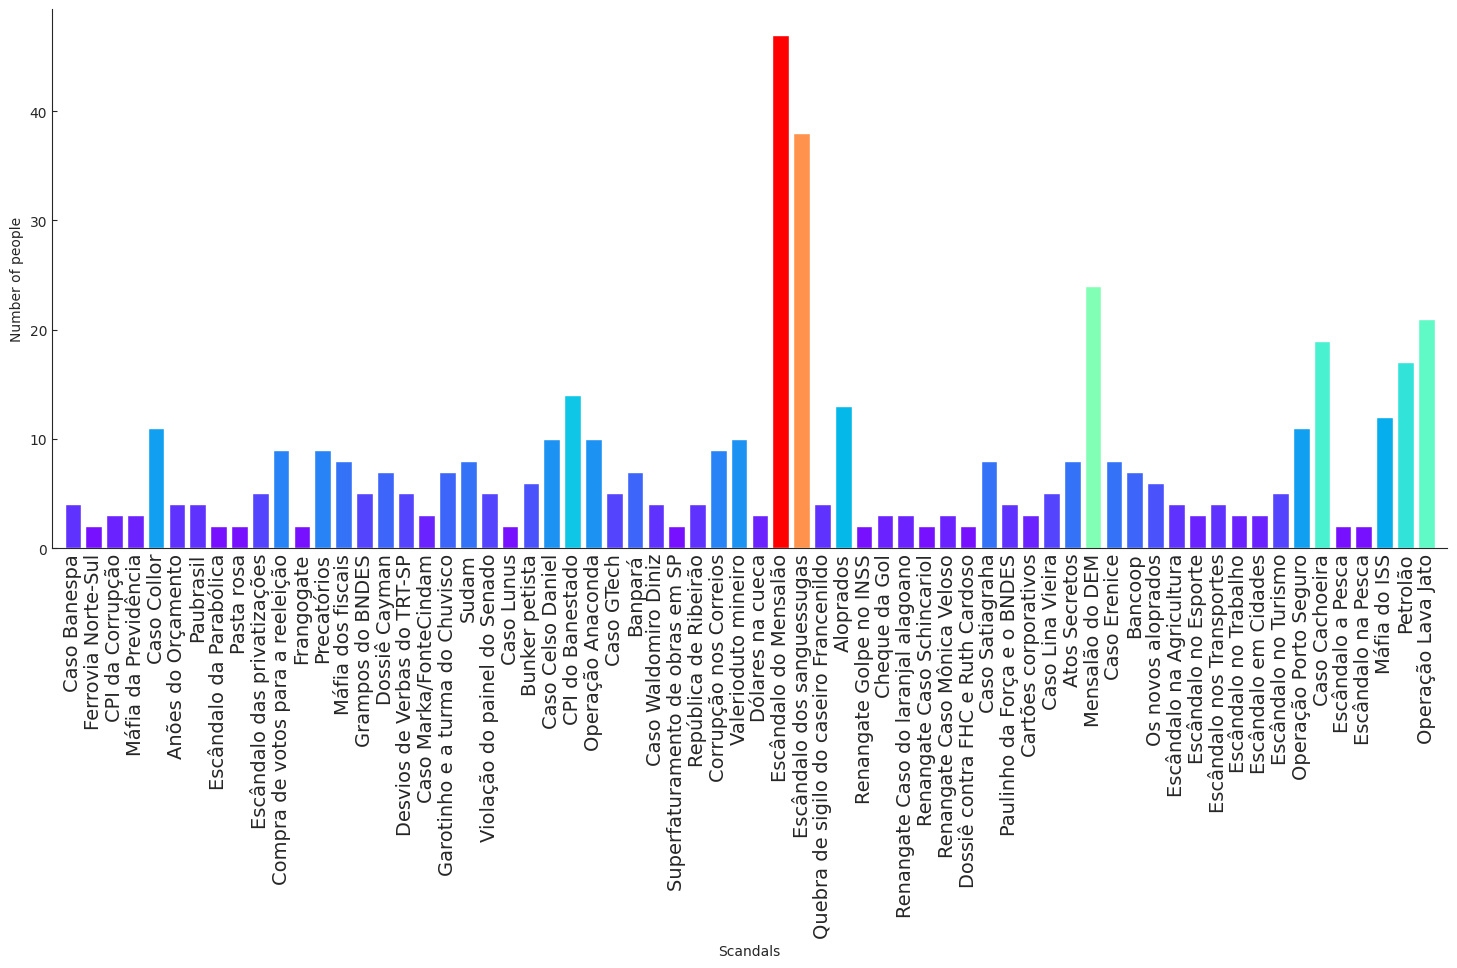

In [132]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
fig, ax = plt.subplots(figsize=(18,7))
y=df_size['size'].values.astype(int)
x=np.array(df_size.index)

norm = mpl.colors.Normalize(vmin=1, vmax=max(y))
cmap = plt.cm.rainbow
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cmaplist = [m.to_rgba(i) for i in y]
ax.bar(x,y,color=cmaplist)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='x',length=0)
# ax.tick_params(axis="x",length=0,direction="in", pad=-200)

ax.set_xlim(-1,66)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
labels=["",""]
labels.extend(list(df_size.scandal))
ax.set_xticklabels(labels,rotation=90,fontsize=14)
ax.set_ylabel(r"Number of people")
ax.set_xlabel(r"Scandals")

# Scandal size distribution

In [133]:
bins, densities=cdf(df_size['size'], nbins=15, log=False, surv=True)

In [134]:
loc, scale = stats.expon.fit(df_size['size'], floc=0)

(2.0, 5.424242424242424)


Text(0.5, 0, 'Degree, $k$')

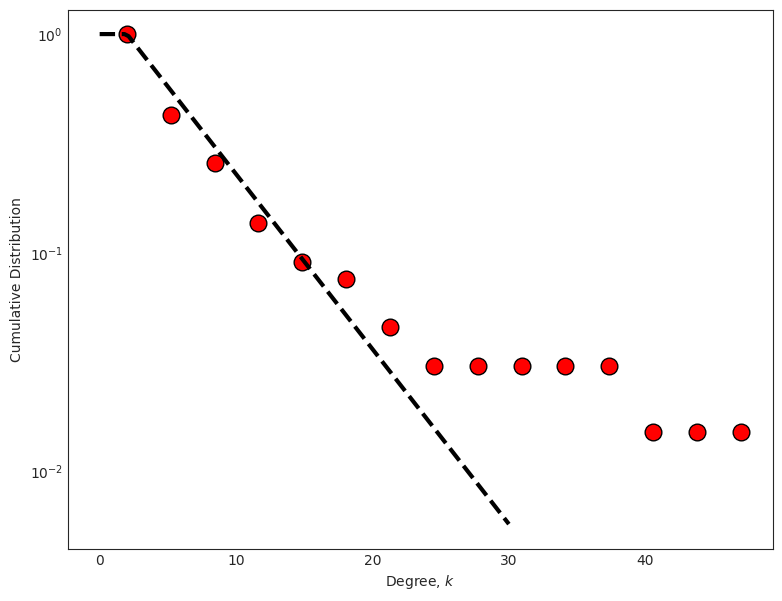

In [135]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
fig, ax = plt.subplots(figsize=figsize)
ax.plot(bins, densities,
        marker='o',
        color='r',
        markeredgecolor='k',
        markersize=12,
        linewidth=0)

rX = np.linspace(0,30, 100)
params = stats.expon.fit(df_size['size'])
rP=1-stats.expon.cdf(rX, *params)
print(params)
ax.plot(rX, rP,'k--',linewidth=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.set_yscale('log')
ax.set_ylabel(r"Cumulative Distribution")
ax.set_xlabel(r"Degree, $k$")

# Number of people investigated over time

In [136]:
df=df_size.groupby('year').sum().reset_index()
df.head()

year  size
0  1987     6
1  1988     3
2  1991     3
3  1992    11
4  1993     8

In [137]:
x,y=df.year,df['size']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err )

def f_linear(x,slope, intercept):
    y=intercept+slope*x
    return y

1.1727945005728568 -2327.818560566607 0.5484637080966225 0.004528762927255238 0.372826654569419


Text(0.5, 0, 'Time, $t$')

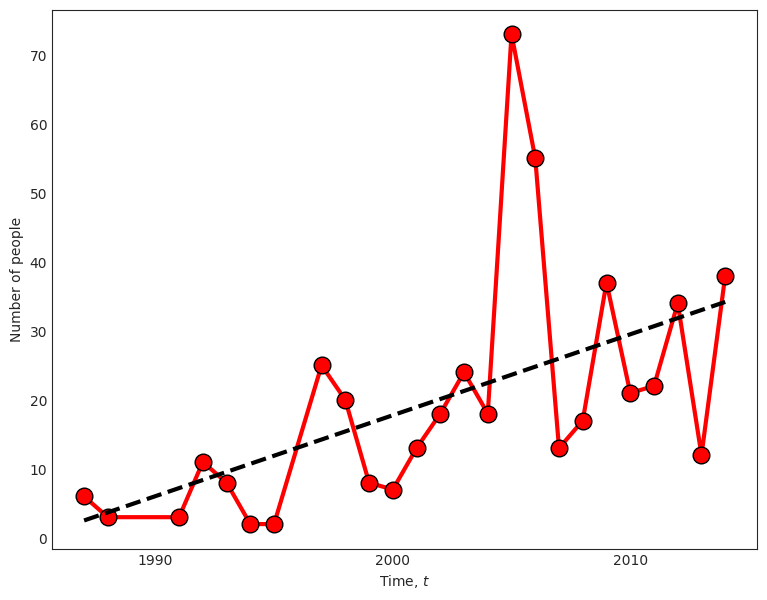

In [138]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y,
        marker='o',
        color='r',
        markeredgecolor='k',
        markersize=12,
        linewidth=3)

xr=np.arange(1987,2015,1)

ax.plot(x, f_linear(x,slope, intercept),
        marker='o',
        color='k',
        linestyle='dashed',
        markeredgecolor='k',
        markersize=0,
        linewidth=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))


ax.set_ylabel(r"Number of people")
ax.set_xlabel(r"Time, $t$")

# Autocorrelation

In [139]:
def autocorr(x,lag):
    if lag==0:
        return 1
    return np.corrcoef(x[lag:],x[:-lag])[0][1]

def conflagcor(lag,n,alpha):
    from scipy.special import erfinv
    yinf=(-1 - 2**(1/2)*erfinv(1 - alpha)*(n - lag - 1)**(1/2))/(n - lag)
    ysup=(-1 + 2**(1/2)*erfinv(1 - alpha)*(n - lag - 1)**(1/2))/(n - lag)
    return yinf,ysup

In [140]:
yinf=[conflagcor(lag,100,0.05)[0] for lag in range(0,10)]
ysup=[conflagcor(lag,100,0.05)[1] for lag in range(0,10)]

Text(0.5, 0, 'Lag, $\\tau$')

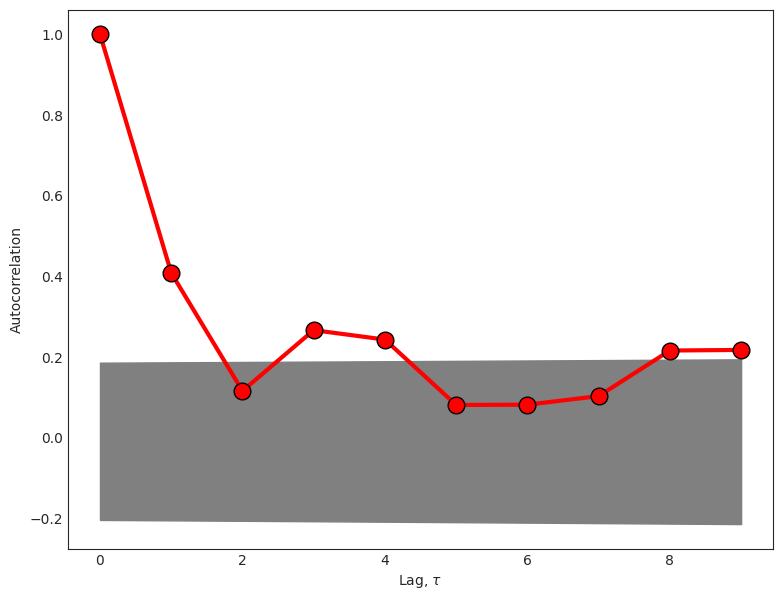

In [142]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
fig, ax = plt.subplots(figsize=figsize)
xauto=np.arange(0,10,1)
yaut=[autocorr(y,lag) for lag in range(0,10)]
ax.plot(xauto,yaut,
        marker='o',
        color='r',
        markeredgecolor='k',
        markersize=12,
        linewidth=3)
ax.fill_between(xauto, yinf, ysup,color='gray')

ax.set_ylabel(r"Autocorrelation")
ax.set_xlabel(r"Lag, $\tau$")

# Load data

In [148]:
df_net=pd.read_csv("/content/drive/MyDrive/sin../SIN PROJECT/Corruption Analysis/data/edge_list.csv")[['Source','Target']]
df_net.head()

Source  Target
0     246     243
1     246      60
2     246     240
3     246     242
4     246     241

# Corruption network

In [147]:
G=nx.Graph()
G.add_edges_from(df_net.values)

In [149]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 404
Number of edges: 3549


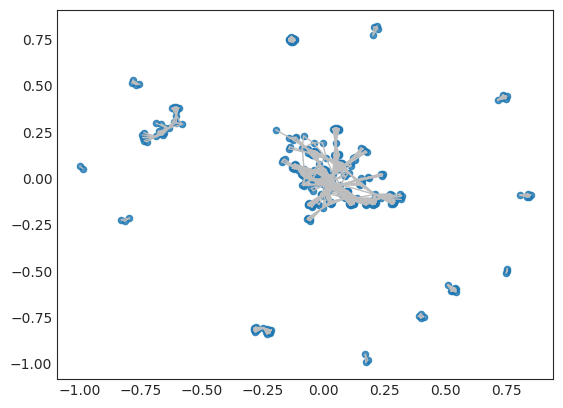

In [150]:
# NETWORK
pos = nx.spring_layout(G)

# Extract x and y coordinates
x_coords = [pos[node][0] for node in G.nodes()]
y_coords = [pos[node][1] for node in G.nodes()]

# Plot nodes
node_size = 20
node_color = '#1f78b4'  # blue color
plt.scatter(x_coords, y_coords, s=node_size, c=node_color, alpha=0.8)

# Plot edges
edge_color = '#bdbdbd'  # gray color
edge_width = 1
for edge in G.edges():
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    plt.plot(x, y, color=edge_color, linewidth=edge_width)

plt.show()

# Structural properties

In [151]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 404
Number of edges: 3549


In [152]:
# Define the parameters for the Erdős-Rényi graph
num_nodes = 404
probability_of_edge = 2 * 3549 / (404 ** 2)

# Create the Erdős-Rényi graph
G_erdos_renyi = nx.erdos_renyi_graph(num_nodes, p=probability_of_edge)

In [153]:
print("Number of nodes:", G_erdos_renyi.number_of_nodes())
print("Number of edges:", G_erdos_renyi.number_of_edges())


Number of nodes: 404
Number of edges: 3655


In [154]:
G_rand=G.copy()
nx.double_edge_swap(G_rand,nswap=1000,max_tries=10000)

In [155]:
np.average(list(dict(G.degree()).values()))

17.56930693069307

In [156]:
print('assortativity_coefficient - empirical',
      nx.degree_assortativity_coefficient(G))
print('assortativity_coefficient - configuration',
      nx.degree_assortativity_coefficient(G_rand))
print('assortativity_coefficient - random graph',
      nx.degree_assortativity_coefficient(G_erdos_renyi))

assortativity_coefficient - empirical 0.5985375644805352
assortativity_coefficient - configuration 0.27870025568428675
assortativity_coefficient - random graph 0.008694652809739993


In [157]:
print('average_clustering - empirical',
      nx.average_clustering(G))
print('average_clustering - configuration',
      nx.average_clustering(G_rand))
print('average_clustering - random graph',
      nx.average_clustering(G_erdos_renyi))

average_clustering - empirical 0.925765588813958
average_clustering - configuration 0.19266804280123265
average_clustering - random graph 0.044734953988604914


In [158]:
print('global_efficiency - empirical',
      nx.global_efficiency(G))
print('global_efficiency - configuration',
      nx.global_efficiency(G_rand))
print('global_efficiency - random graph',
      nx.global_efficiency(G_erdos_renyi))

global_efficiency - empirical 0.2344131648187608
global_efficiency - configuration 0.4140061338644976
global_efficiency - random graph 0.4515207724247851


In [159]:
gcc=sorted(nx.connected_components(G),key=len,reverse=True)[0]
sp=nx.average_shortest_path_length(nx.subgraph(G,gcc))
print('average_shortest_path_length - empirical',sp)

gcc=sorted(nx.connected_components(G_rand),key=len,reverse=True)[0]
sp=nx.average_shortest_path_length(nx.subgraph(G_rand,gcc))
print('average_shortest_path_length - configuration',sp)

gcc=sorted(nx.connected_components(G_erdos_renyi),key=len,reverse=True)[0]
sp=nx.average_shortest_path_length(nx.subgraph(G_erdos_renyi,gcc))
print('average_shortest_path_length - random graph',sp)

average_shortest_path_length - empirical 2.990018072542344
average_shortest_path_length - configuration 2.6326100172454434
average_shortest_path_length - random graph 2.380733606859445


# Degree distribution

In [160]:
degree_sequence = [d for n, d in G.degree()] # degree sequence

Text(0.5, 0, 'Degree, $k$')

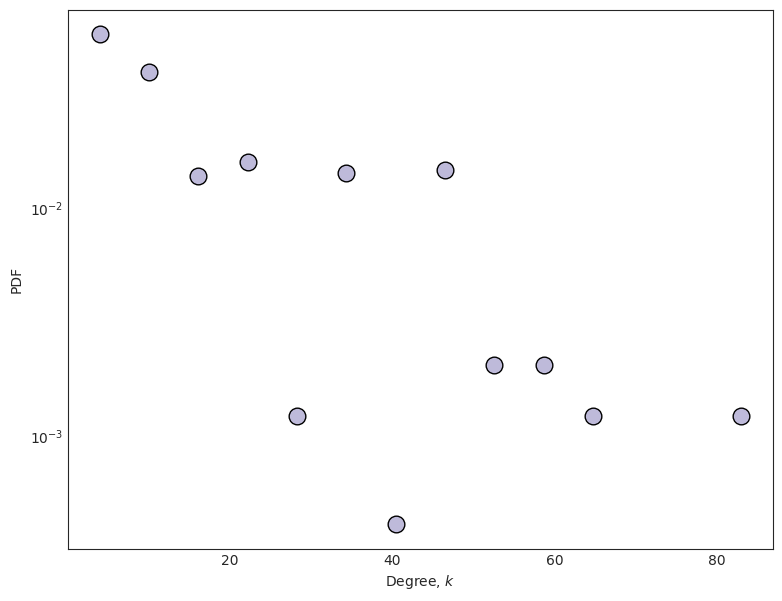

In [161]:
fig, ax = plt.subplots(figsize=figsize)
bins, densities=pdf(np.array(degree_sequence),log=False)
ax.plot(bins, densities,
        marker='o',
        color='#bebada',
        markeredgecolor='k',
        markersize=12,
        linewidth=0)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

ax.set_yscale('log')
ax.set_ylabel(r"PDF")
ax.set_xlabel(r"Degree, $k$")

In [162]:
loc, scale = stats.expon.fit(degree_sequence, floc=0)

(1.0, 16.56930693069307)


Text(0.5, 0, 'Degree, $k$')

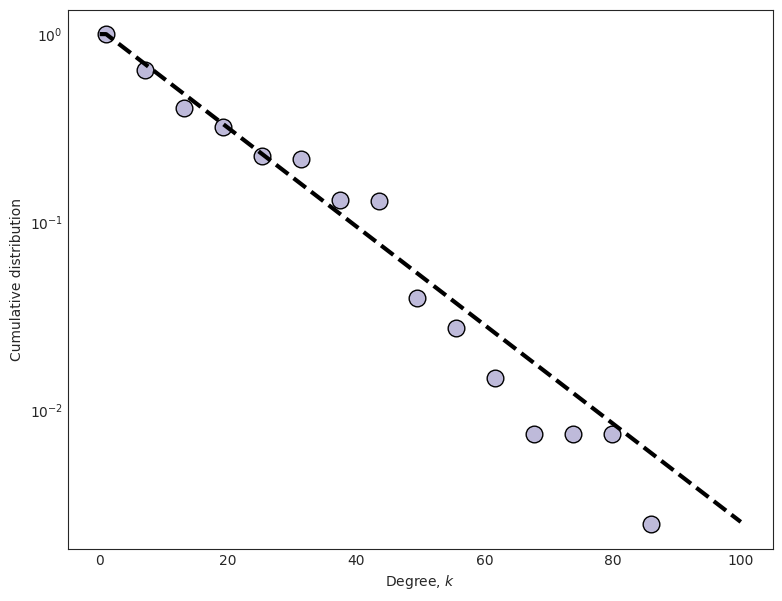

In [163]:
fig, ax = plt.subplots(figsize=figsize)
bins, densities=cdf(np.array(degree_sequence))
ax.plot(bins, densities,
        marker='o',
        color='#bebada',
        markeredgecolor='k',
        markersize=12,
        linewidth=0)

rX = np.linspace(0,100, 100)
params = stats.expon.fit(degree_sequence)
rP=1-stats.expon.cdf(rX, *params)
print(params)
ax.plot(rX, rP,'k--',linewidth=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

ax.set_yscale('log')
ax.set_ylabel(r"Cumulative distribution")
ax.set_xlabel(r"Degree, $k$")

# Centrality distribution

In [164]:
btw=nx.betweenness_centrality(G)
btw_rand=nx.betweenness_centrality(G_rand)
btw_er=nx.betweenness_centrality(G_erdos_renyi)

In [165]:
btw_sequence = list(btw.values() )# betweenness sequence
btw_sequence_rand = list(btw_rand.values() )# betweenness sequence
btw_sequence_er = list(btw_er.values() )# betweenness sequence

Text(0.5, 0, 'Betweenness, $b$')

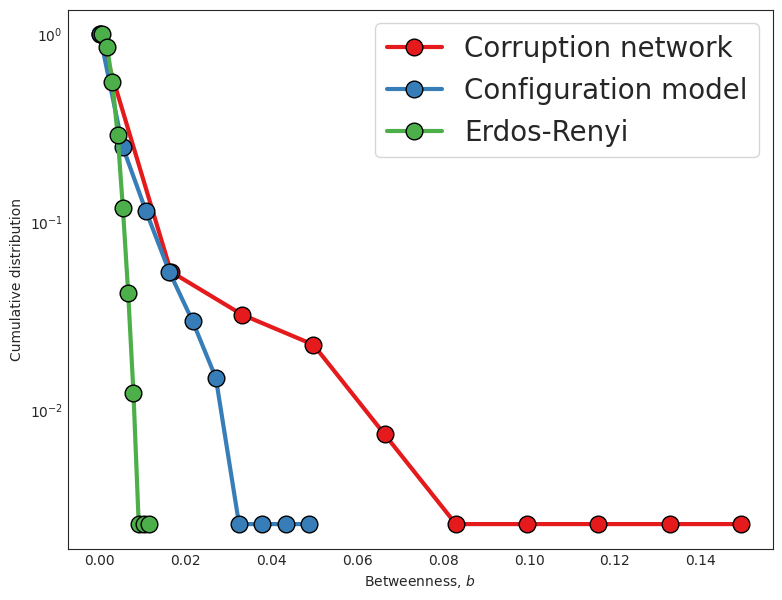

In [166]:
fig, ax = plt.subplots(figsize=figsize)
bins, densities=cdf(np.array(btw_sequence),nbins=10,log=False)
ax.plot(bins, densities,
        marker='o',
        color='#e41a1c',
        markeredgecolor='k',
        markersize=12,
        linewidth=3,
       label='Corruption network')

bins, densities=cdf(np.array(btw_sequence_rand),nbins=10,log=False)
ax.plot(bins, densities,
        marker='o',
        color='#377eb8',
        markeredgecolor='k',
        markersize=12,
        linewidth=3,
       label='Configuration model')

bins, densities=cdf(np.array(btw_sequence_er),nbins=10,log=False)
ax.plot(bins, densities,
        marker='o',
        color='#4daf4a',
        markeredgecolor='k',
        markersize=12,
        linewidth=3,
       label='Erdos-Renyi')

ax.legend(fontsize=20)
ax.set_yscale('log')
ax.set_ylabel(r"Cumulative distribution")
ax.set_xlabel(r"Betweenness, $b$")

# Community structure

In [167]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

In [168]:
# Assuming G is your networkx graph
G = nx.erdos_renyi_graph(100, 0.1)

In [169]:
# Community detection using Girvan-Newman algorithm
communities_generator = nx.community.girvan_newman(G)
communities = next(communities_generator)
partition = {node: cid for cid, nodes in enumerate(communities) for node in nodes}

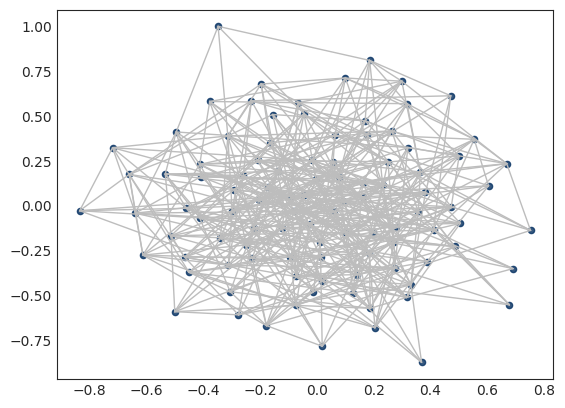

In [170]:
# NETWORK
node_size = (np.array(list(dict(G.degree()).values()))) / 5
node_size[node_size < 3] = 3

cmap = plt.get_cmap('RdBu_r')
cNorm = colors.Normalize(vmin=min(node_size), vmax=max(node_size))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

pos = nx.spring_layout(G)
count = 0.

# Plot nodes
for i in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == i]
    k = G.subgraph(list_nodes)
    colorVal = scalarMap.to_rgba(i)
    x_coords = [pos[node][0] for node in k.nodes()]
    y_coords = [pos[node][1] for node in k.nodes()]
    plt.scatter(x_coords, y_coords, s=20, c=colors.rgb2hex(colorVal), alpha=0.8)

# Plot edges
edge_color = '#bdbdbd'  # gray color
edge_width = 1
for edge in G.edges():
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    plt.plot(x, y, color=edge_color, linewidth=edge_width)

plt.show()

Node's role


In [171]:
print(df_net.columns)

Index(['Source', 'Target'], dtype='object')


Community 0 Centrality Measures:
Degree Centrality: {0: 0.12244897959183673, 1: 0.12244897959183673, 2: 0.11224489795918366, 3: 0.08163265306122448, 4: 0.09183673469387754, 5: 0.061224489795918366, 6: 0.09183673469387754, 7: 0.07142857142857142, 8: 0.04081632653061224, 9: 0.11224489795918366, 10: 0.17346938775510204, 11: 0.09183673469387754, 12: 0.07142857142857142, 13: 0.09183673469387754, 14: 0.061224489795918366, 15: 0.1020408163265306, 16: 0.12244897959183673, 17: 0.11224489795918366, 18: 0.12244897959183673, 19: 0.09183673469387754, 20: 0.12244897959183673, 21: 0.1020408163265306, 22: 0.1020408163265306, 23: 0.061224489795918366, 24: 0.14285714285714285, 25: 0.0510204081632653, 26: 0.17346938775510204, 27: 0.16326530612244897, 28: 0.1020408163265306, 29: 0.11224489795918366, 30: 0.1020408163265306, 31: 0.11224489795918366, 32: 0.17346938775510204, 33: 0.13265306122448978, 34: 0.11224489795918366, 35: 0.11224489795918366, 36: 0.16326530612244897, 37: 0.1020408163265306, 38: 0.09183

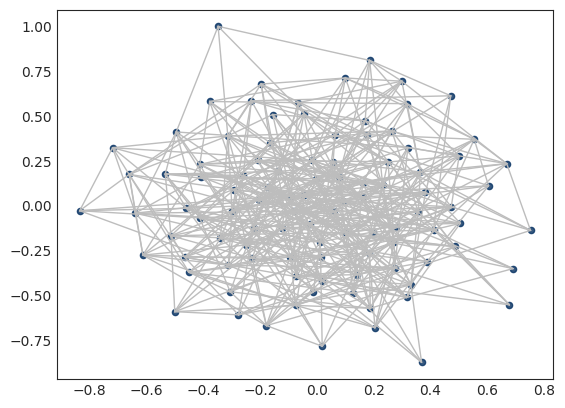

In [172]:
# Plot nodes and calculate centrality measures
for i in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == i]
    k = G.subgraph(list_nodes)
    colorVal = scalarMap.to_rgba(i)

    # Plot nodes
    x_coords = [pos[node][0] for node in k.nodes()]
    y_coords = [pos[node][1] for node in k.nodes()]
    plt.scatter(x_coords, y_coords, s=20, c=colors.rgb2hex(colorVal), alpha=0.8)

    # Calculate and print centrality measures
    print(f"Community {i} Centrality Measures:")
    degree_centrality = nx.degree_centrality(k)
    print(f"Degree Centrality: {degree_centrality}")

    betweenness_centrality = nx.betweenness_centrality(k)
    print(f"Betweenness Centrality: {betweenness_centrality}")

    closeness_centrality = nx.closeness_centrality(k)
    print(f"Closeness Centrality: {closeness_centrality}")

# Plot edges
edge_color = '#bdbdbd'  # gray color
edge_width = 1
for edge in G.edges():
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    plt.plot(x, y, color=edge_color, linewidth=edge_width)

plt.show()


Community 0 Centrality Measures:
Node 0:
   Degree Centrality: 0.12244897959183673
   Betweenness Centrality: 0.02074028578423855
   Closeness Centrality: 0.47572815533980584
Node 1:
   Degree Centrality: 0.07142857142857142
   Betweenness Centrality: 0.005943653985757427
   Closeness Centrality: 0.44545454545454544
Node 2:
   Degree Centrality: 0.12244897959183673
   Betweenness Centrality: 0.014171359778813121
   Closeness Centrality: 0.47572815533980584
Node 3:
   Degree Centrality: 0.11224489795918366
   Betweenness Centrality: 0.00996718685892937
   Closeness Centrality: 0.47342995169082125
Node 4:
   Degree Centrality: 0.08163265306122448
   Betweenness Centrality: 0.007858287964351007
   Closeness Centrality: 0.4188034188034188
Node 5:
   Degree Centrality: 0.1020408163265306
   Betweenness Centrality: 0.010699772850863279
   Closeness Centrality: 0.4688995215311005
Node 6:
   Degree Centrality: 0.14285714285714285
   Betweenness Centrality: 0.0232300585869176
   Closeness Cent

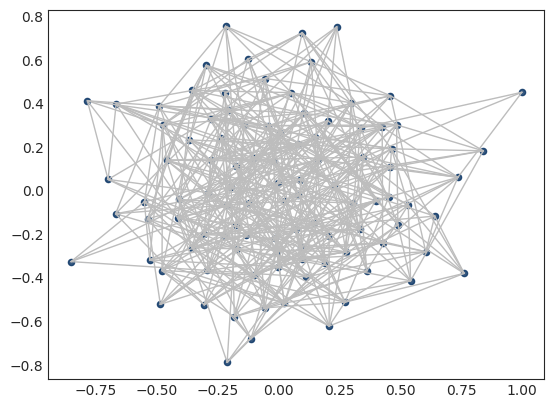

In [173]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

# Assuming G is your networkx graph
G = nx.erdos_renyi_graph(100, 0.1)  # replace with your actual graph

# Community detection using Girvan-Newman algorithm
communities_generator = nx.community.girvan_newman(G)
communities = next(communities_generator)
partition = {node: cid for cid, nodes in enumerate(communities) for node in nodes}

# NETWORK
node_size = (np.array(list(dict(G.degree()).values()))) / 5
node_size[node_size < 3] = 3

cmap = plt.get_cmap('RdBu_r')
cNorm = colors.Normalize(vmin=min(node_size), vmax=max(node_size))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

pos = nx.spring_layout(G)
count = 0.

# Store conclusions in a dictionary
conclusions = {"Proximity Node": [], "Peripheral Node": [], "Hub": [], "Connector": []}

# Plot nodes and calculate centrality measures
for i in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == i]
    k = G.subgraph(list_nodes)
    colorVal = scalarMap.to_rgba(i)

    # Calculate centrality measures
    degree_centrality = nx.degree_centrality(k)
    betweenness_centrality = nx.betweenness_centrality(k)
    closeness_centrality = nx.closeness_centrality(k)



    # Print results for each node in the community
    print(f"\nCommunity {i} Centrality Measures:")
    for node in list_nodes:
        print(f"Node {node}:")
        print(f"   Degree Centrality: {degree_centrality[node]}")
        print(f"   Betweenness Centrality: {betweenness_centrality[node]}")
        print(f"   Closeness Centrality: {closeness_centrality[node]}")

        # Conclude the role based on centrality measures
        role = ""
        if degree_centrality[node] > 0.5:
            role = "Hub"
        elif betweenness_centrality[node] > 0.3:
            role = "Connector"
        elif closeness_centrality[node] > 0.5:
            role = "Proximity Node"
        else:
            role = "Peripheral Node"

        # Store community conclusions
        conclusions[role].append(node)

    # Plot nodes
    x_coords = [pos[node][0] for node in k.nodes()]
    y_coords = [pos[node][1] for node in k.nodes()]
    plt.scatter(x_coords, y_coords, s=20, c=colors.rgb2hex(colorVal), alpha=0.8)

# Plot edges
edge_color = '#bdbdbd'  # gray color
edge_width = 1
for edge in G.edges():
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    plt.plot(x, y, color=edge_color, linewidth=edge_width)

# Print the conclusions
print("\nNode Roles in Each Community:")
for role, nodes in conclusions.items():
    print(f"\n{role}: {nodes}")



# Temporal network

In [174]:
data=dict()
for year in range(1987,2015):
    data[year]=pd.read_csv(f'/content/drive/MyDrive/sin../SIN PROJECT/Corruption Analysis/data/{year}.csv',index_col=0)

## Degree evolution

In [175]:
data[2000].head()

Source  Target
0      83      10
1      83      78
2      83      77
3      83       6
4      83      45

In [176]:
c_degree=[]
for year in range(1987,2015):
    df=data[year]
    G=nx.Graph()
    G.add_edges_from(df.values)
    degree_sequence = [d for n, d in G.degree()] # degree sequence
    loc, scale = stats.expon.fit(degree_sequence, floc=0)
    c_degree.append(scale)

Text(0.5, 0, 'Year, $t$')

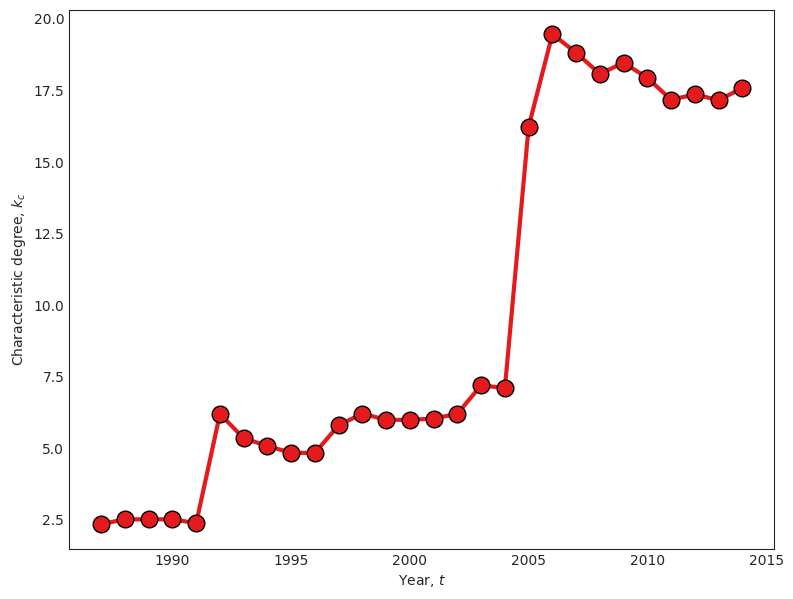

In [177]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.arange(1987,2015),
        c_degree,
        marker='o',
        color='#e41a1c',
        markeredgecolor='k',
        markersize=12,
        linewidth=3)

ax.set_ylabel(r'Characteristic degree, $k_c$')
ax.set_xlabel(r"Year, $t$")

## Largest connected component

In [178]:
list_lcc = []

for year in range(1987, 2015):
    df = data[year]
    G = nx.Graph()
    G.add_edges_from(df.values)
    lcc_nodes = max(nx.connected_components(G), key=len)
    lcc = G.subgraph(lcc_nodes)
    list_lcc.append(len(lcc.nodes) / len(G.nodes))


Text(0.5, 0, 'Year, $t$')

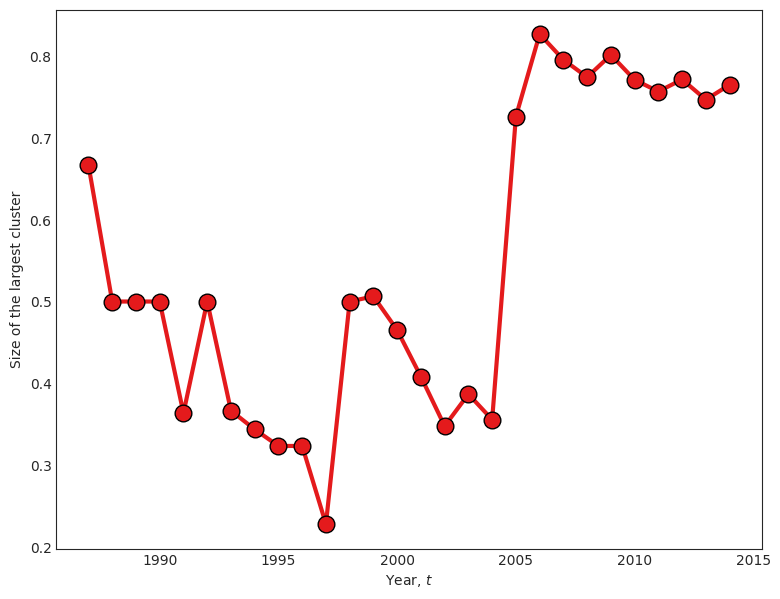

In [179]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.arange(1987,2015),
        list_lcc,
        marker='o',
        color='#e41a1c',
        markeredgecolor='k',
        markersize=12,
        linewidth=3)

ax.set_ylabel(r'Size of the largest cluster')
ax.set_xlabel(r"Year, $t$")

In [180]:
growth_lcc=[list_lcc[i+1]-list_lcc[i] for i in range(0,len(list_lcc)-1)]

Text(0.5, 0, 'Year, $t$')

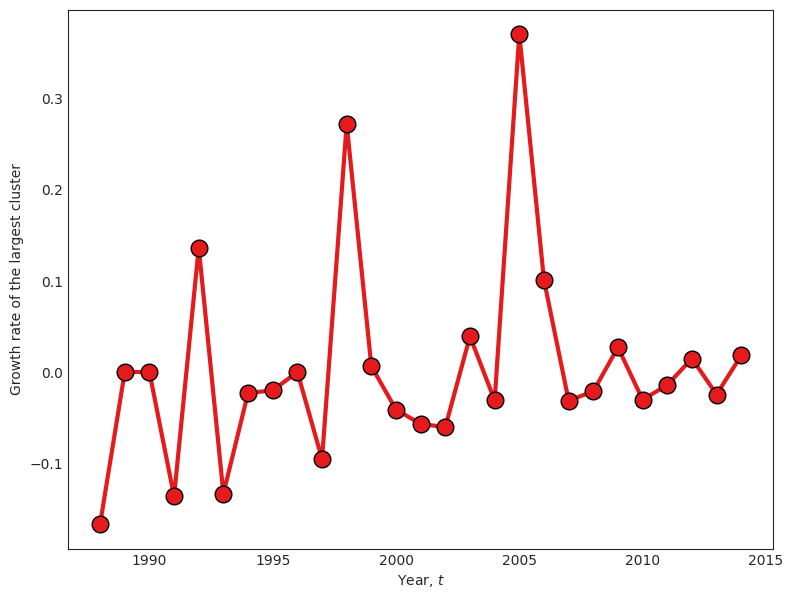

In [181]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.arange(1988,2015),
        growth_lcc,
        marker='o',
        color='#e41a1c',
        markeredgecolor='k',
        markersize=12,
        linewidth=3)

ax.set_ylabel(r'Growth rate of the largest cluster')
ax.set_xlabel(r"Year, $t$")

# Link prediction

In [182]:
!pip install linkpred

In [183]:
import linkpred

In [184]:
df=data[2014]
G=nx.Graph()
G.add_edges_from(df.values)

In [185]:
edges=list(G.edges())

In [186]:
import random

In [187]:
edges_to_remove=[random.choice(edges) for i in range(5)]

In [188]:
H=G.copy()
H.remove_edges_from(edges_to_remove)

In [189]:
simrank = linkpred.predictors.SimRank(H, excluded=H.edges())

In [190]:
simrank_results = simrank.predict(c=0.5)

In [191]:
top = simrank_results.top(5)
for pair_of_nodes, score in top.items():
    print(f'Edge: {str(pair_of_nodes):20s} Score: {round(score,3)}')

Edge: 262 - 111            Score: 0.5
Edge: 355 - 262            Score: 0.265
Edge: 355 - 111            Score: 0.265
Edge: 262 - 131            Score: 0.265
Edge: 262 - 73             Score: 0.265


In [192]:
edges_predicted=[tuple(item[0]) for item  in top.items()]

In [193]:
edges_to_remove=set(edges_to_remove)
edges_predicted=set(edges_predicted)

In [194]:
edges_to_remove,edges_predicted

({(79, 11), (120, 101), (218, 60), (381, 222), (386, 220)},
 {(262, 73), (262, 111), (262, 131), (355, 111), (355, 262)})

In [195]:
[item in set(edges_predicted) for item in edges_to_remove]

[False, False, False, False, False]

In [196]:
edges_to_remove

{(79, 11), (120, 101), (218, 60), (381, 222), (386, 220)}